In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [7]:
data = pd.read_csv('/content/3.12.+Example.csv')
data

#Satisfcation is measured through a survey 0 to 10
#Loyalty is measured through the purchases of 1 year + other significant factors -2.5 to 2.5 (standarized)

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


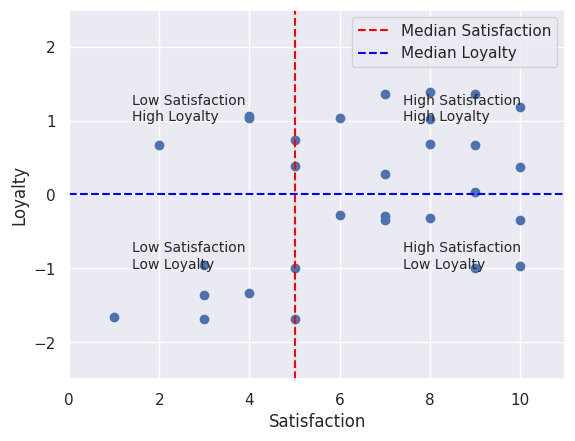

In [8]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

plt.ylim(-2.5,2.5)
plt.xlim(0,11)

# Get the center coordinates for the lines
center_x = np.mean(data['Satisfaction'])
center_y = np.mean(data['Loyalty'])

# Add vertical line
plt.axvline(x=5, color='red', linestyle='--', label='Median Satisfaction')

# Add horizontal line
plt.axhline(y=center_y, color='blue', linestyle='--', label='Median Loyalty')

# Add labels to sections
plt.text(center_x + 1, center_y + 1, 'High Satisfaction\nHigh Loyalty', fontsize=10)
plt.text(center_x + 1, center_y - 1, 'High Satisfaction\nLow Loyalty', fontsize=10)
plt.text(center_x - 5, center_y + 1, 'Low Satisfaction\nHigh Loyalty', fontsize=10)
plt.text(center_x - 5, center_y - 1, 'Low Satisfaction\nLow Loyalty', fontsize=10)

# Add legend for lines
plt.legend()

plt.show()


#We can identify 2 clusters visually, but logically we need 4 clusters

In [9]:
x = data.copy()

kmeans = KMeans(2)
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [10]:
clusters = x.copy()
clusters['cluster_pred']= kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Loyalty')

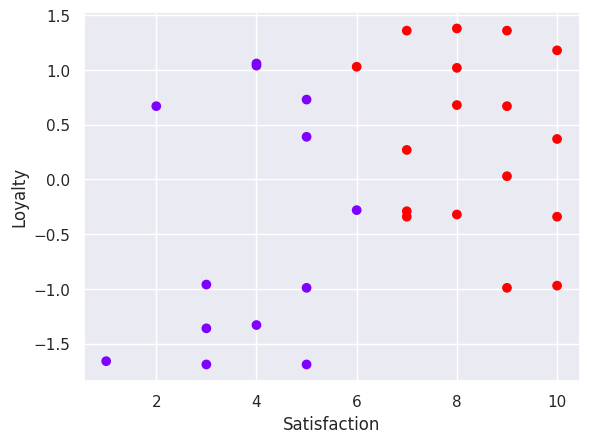

In [11]:
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'], c=clusters['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
#because the clusters are divided in a vertical line at 6, the Kmeans algo disregarded the loyality
#this is because the satisfation numbers are much higher than loyalty.
#to solve this problem, we need to standarize

In [12]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x) #each column will be standarized in respect to itself
x_scaled
#the output shows standarized satisfaction, while loyalty remains the same because it was already standarized

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

#Elbow method to correctly identify the number of clusters

In [13]:
wcss =[]

for i in range(1,10):
  kmeans = KMeans(i)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)

wcss

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.549836791599331,
 5.366082587179451,
 4.4492366515919,
 3.7799886162052667]

Text(0, 0.5, 'wcss')

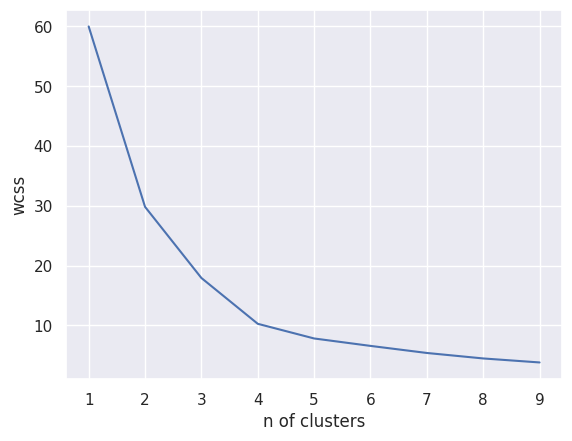

In [14]:
plt.plot(range(1,10), wcss)
plt.xlabel('n of clusters')
plt.ylabel('wcss')

#4 would be optimal based on the elbow method + the logical analysis

In [15]:
kmeans_new = KMeans(2)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

clusters_new
#Showing the original data WITHOUT standarizing
#but also showing the solution ON standarized data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,0
1,6,-0.28,1
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,1
5,1,-1.66,0
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,1
9,8,0.68,1


Text(0, 0.5, 'Loyalty')

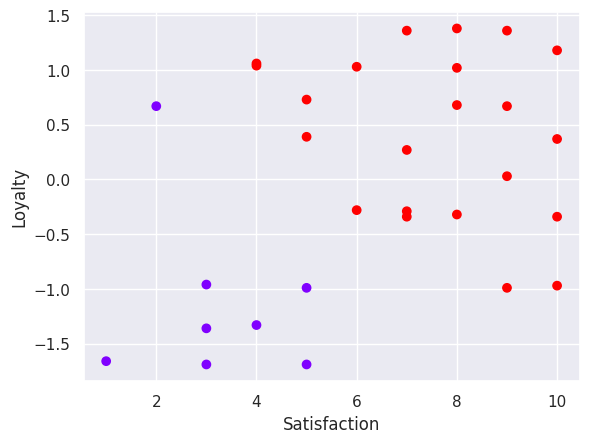

In [16]:
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'], c=clusters_new['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

#The clustering is different from the first graph using the standarized satisfaction

    Satisfaction  Loyalty  cluster_pred
0              4    -1.33             2
1              6    -0.28             1
2              5    -0.99             2
3              7    -0.29             1
4              4     1.06             0
5              1    -1.66             2
6             10    -0.97             1
7              8    -0.32             1
8              8     1.02             3
9              8     0.68             3
10            10    -0.34             1
11             5     0.39             0
12             5    -1.69             2
13             2     0.67             0
14             7     0.27             1
15             9     1.36             3
16             8     1.38             3
17             7     1.36             3
18             7    -0.34             1
19             9     0.67             3
20            10     1.18             3
21             3    -1.69             2
22             4     1.04             0
23             3    -0.96             2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(1.4000000000000004, -0.999, 'Alienated')

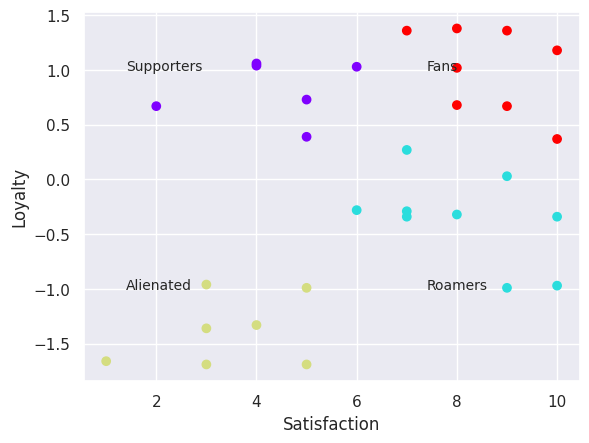

In [17]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

print(clusters_new)

colors = ['blue', 'green', 'red', 'purple']
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'], c=clusters_new['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')


# Get the center coordinates for the lines
center_x = np.mean(data['Satisfaction'])
center_y = np.mean(data['Loyalty'])


# Add labels to sections
plt.text(center_x + 1, center_y + 1, 'Fans', fontsize=10)
plt.text(center_x + 1, center_y - 1, 'Roamers', fontsize=10)
plt.text(center_x - 5, center_y + 1, 'Supporters', fontsize=10)
plt.text(center_x - 5, center_y - 1, 'Alienated', fontsize=10)

#bottom left: Alienated
#top left: Supporters
#bottom right: Roamers
#Top right: Fans

#Clustering using a Dendtrogram heatmap

In [20]:
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,2
1,6,-0.28,1
2,5,-0.99,2
3,7,-0.29,1
4,4,1.06,0
5,1,-1.66,2
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,3
9,8,0.68,3


In [69]:
#Dropping cluster_pred column so it doesn't affect preprocessing
clusters_new_Dendreogram = clusters_new.drop(columns=['cluster_pred'])
clusters_new_Dendreogram_scaled = preprocessing.scale(clusters_new_Dendreogram)

#Adding the cluster_pred to the data
clusters_new_Dendreogram_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

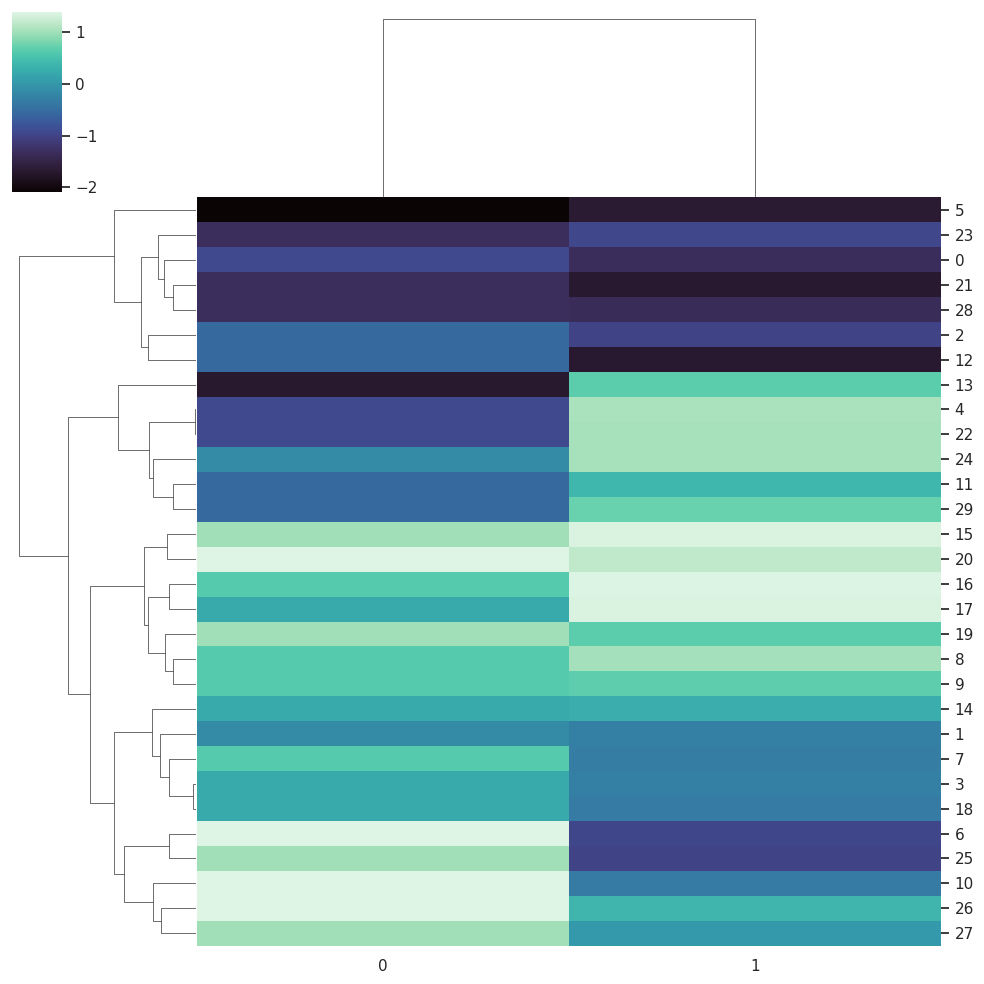

In [70]:
sns.clustermap(clusters_new_Dendreogram_scaled, cmap='mako')

#Column 0: Satiscation
#Column 1: Loyalty
#Both columns are standarized